In [1]:
import argparse
import pathlib
import pickle
import random
import json
from tqdm import tqdm
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
from python_speech_features import mel2hz, hz2mel
from scipy import interpolate

%matplotlib inline

In [2]:
cam_method = 'GradCAMpp' # LayerCAM GradCAMpp
data_dir = '/home/work2020/yangwenhao/project/reliable-visualization-for-deep-speaker-recognition/egs/voxceleb/visualization/single/salient_np_vad/%s/layer4/%s'%(cam_method, cam_method)

In [3]:
all_layer_cams = []
for i in range(40):
    pics = np.load(data_dir + '/%s_pic_%d.npy'%(cam_method, i), allow_pickle=True)
    all_layer_cams.extend(list(pics))

In [ ]:
plt.figure(figsize=(12, 4))
plt.imshow(pic_0[0].reshape(80, -1))

In [5]:
layer_cams = [cam.reshape(80, -1) for cam in all_layer_cams]

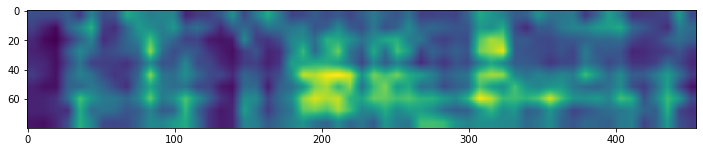

In [10]:
plt.figure(figsize=(12, 2.5))
plt.imshow(layer_cams[0])

In [6]:
def mean_norm(grad):
    return np.abs(grad).mean(axis=1)

def clip_mean_norm(grad):
    return np.clip(grad, a_min=0, a_max=None).mean(axis=1)

def sum_norm(grad):
    cam = np.abs(grad).sum(axis=1)
    cam = (cam - cam.min()) / (cam.max()-cam.min() + 1e-6)
    return cam

def clip_sum_norm(grad):
    cam = np.clip(grad, a_min=0, a_max=None).sum(axis=1)
    cam = (cam - cam.min()) / (cam.max()-cam.min() + 1e-6)
    return cam

In [7]:
grad_weight = np.zeros((80))
norm_func = sum_norm

for cam in tqdm(layer_cams, ncols=50):
    grad_weight += norm_func(cam)
grad_weight /= len(layer_cams)

100%|██████| 2000/2000 [00:00<00:00, 23368.48it/s]


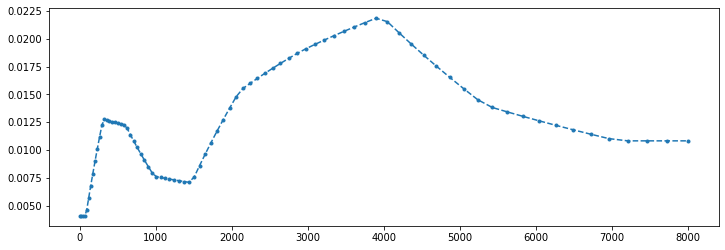

In [8]:
plt.figure(figsize=(12, 4))
x = np.linspace(0, hz2mel(8000), 80)
x = mel2hz(x)

for i,m in enumerate([grad_weight]):
    plt.plot(x, m/m.sum(), '--', marker='.')
    
plt.savefig('data/reliable/v2_%s_%s.png'%(cam_method, str(norm_func).split()[1]), bbox_inches='tight')